# Installing relevant packages and libraries

In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from natsort import natsorted

## Mounting Google Drive so that we can access the result data stored on it which was generated using [this notebook](https://colab.research.google.com/drive/1L41SueuDIZbZ17Fd1HpK1wu-z3077uky#scrollTo=Pwd3fBprvd-k).

In [22]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Parsing Data

## Storing the result data on a python variable and parsing it appropriately so that it is accessible for iteration and plotting the genuine and imposter curves.

In [23]:
with open('gdrive/MyDrive/DeepLearningAssignment/Result_sift.txt', "r") as file:
    data_sift = file.readlines()
with open('gdrive/MyDrive/DeepLearningAssignment/Result_surf.txt', "r") as file:
    data_surf = file.readlines()
with open('gdrive/MyDrive/DeepLearningAssignment/Result_orb.txt', "r") as file:
    data_orb = file.readlines()
#with open('gdrive/MyDrive/DeepLearningAssignment/Result_arcface.txt', "r") as file:
 #   data_arcface = file.readlines()

# Parsing SIFT result data
for i in range(len(data_sift)):
    data_sift[i] = data_sift[i].rstrip()
    data_sift[i] = data_sift[i].split()
    for j in range(len(data_sift[i])):
        data_sift[i][j] = data_sift[i][j].split('_')
i = 0

while i < len(data_sift):
  if data_sift[i][0] == data_sift[i][2] or data_sift[i][0] == data_sift[i][2]:
    del data_sift[i]
  else:
    i += 1
print("All to Well")


# Parsing ORB result data
for i in range(len(data_orb)):
    data_orb[i] = data_orb[i].rstrip()
    data_orb[i] = data_orb[i].split()
    for j in range(len(data_orb[i])):
        data_orb[i][j] = data_orb[i][j].split('_')
i = 0
while i < len(data_orb):
    if data_orb[i][0] == data_orb[i][2] and data_orb[i][0] == data_orb[i][2]:
        del data_orb[i]
    else:
        i += 1
print("All to Well")

# Parsing SURF result data
for i in range(len(data_surf)):
    data_surf[i] = data_surf[i].rstrip()
    data_surf[i] = data_surf[i].split()
    for j in range(len(data_surf[i])):
        data_surf[i][j] = data_surf[i][j].split('_')
i = 0
while i < len(data_surf):
    if data_surf[i][0] == data_surf[i][2] and data_surf[i][0] == data_surf[i][2]:
        del data_surf[i]
    else:
        i += 1


"\n# Parsing ArcFace result data\nfor i in range(len(data_arcface)):\n    data_arcface[i] = data_arcface[i].rstrip()\n    data_arcface[i] = data_arcface[i].split()\n    for j in range(len(data_arcface[i])):\n        data_arcface[i][j] = data_arcface[i][j].split('_')\ni = 0\nwhile i < len(data_arcface):\n    if data_arcface[i][0][2] == data_arcface[i][1][2] and data_arcface[i][0][0] == data_arcface[i][1][0]:\n        del data_arcface[i]\n    else:\n        i += 1\n        "

## Storing genuine and imposter values in separate variables in order to plot respective histograms


In [24]:
genuine_sift = list()
imposter_sift = list()
genuine_surf = list()
imposter_surf = list()
genuine_orb = list()
imposter_orb = list()
genuine_arcface = list()
imposter_arcface = list()
# Function to scale the score values
def scale_down(score, minimum, maximum):
    return (score - minimum) / (maximum- minimum)

# SIFT
score_sift = list()
for i in range(len(data_sift)):
    score_sift.append(float(data_sift[i][2][0]))
minimum = min(score_sift)
maximum = max(score_sift)

for i in range(len(data_sift)):
    id1 = data_sift[i][0][0]
    id2 = data_sift[i][1][0]
    res = scale_down(score_sift[i], minimum, maximum)
    if id1 == id2:
        genuine_sift.append(res)
    else:
        imposter_sift.append(res)

# SURF
score_surf = list()
for i in range(len(data_surf)):
    score_surf.append(float(data_surf[i][2][0]))
minimum = min(score_surf)
maximum = max(score_surf)
for i in range(len(data_surf)):
    id1 = data_surf[i][0][0]
    id2 = data_surf[i][1][0]
    res = scale_down(score_surf[i], minimum, maximum)
    if id1 == id2:
        genuine_surf.append(res)
    else:
        imposter_surf.append(res)

# ORB
score_orb = list()
for i in range(len(data_orb)):
    score_orb.append(float(data_orb[i][2][0]))
minimum = min(score_orb)
maximum = max(score_orb)
for i in range(len(data_orb)):
    id1 = data_orb[i][0][0]
    id2 = data_orb[i][1][0]
    res = scale_down(score_orb[i], minimum, maximum)
    if id1 == id2:
        genuine_orb.append(res)
    else:
        imposter_orb.append(res)


'\n# ArcFace\n# As explained in the ArcFace file, before storing the scores for histogram plotting and ROC curves,\n# we first will need to scale it down and then take its compliment.\nscore_arcface = list()\nfor i in range(len(data_arcface)):\n    score_arcface.append(float(data_arcface[i][2][0]))\nminimum = min(score_arcface)\nmaximum = max(score_arcface)\n\n# Following function scales down the scores\n\nfor i in range(len(score_arcface)):\n    score_arcface[i] = 1 - scale_down(score_arcface[i], minimum, maximum)\n\nfor i in range(len(data_arcface)):\n    id1 = data_arcface[i][0][0]\n    id2 = data_arcface[i][1][0]\n    res = score_arcface[i]\n    if id1 == id2:\n        genuine_arcface.append(res)\n    else:\n        imposter_arcface.append(res)\n        '

# SIFT graphs and histograms

## Plotting genuine and imposter histograms together in single plot

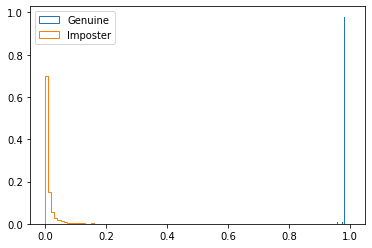

In [25]:
plt.hist(genuine_sift, weights=np.ones_like(genuine_sift) / len(genuine_sift), bins = 100, histtype='step', label = 'Genuine')
plt.hist(imposter_sift, weights = np.ones_like(imposter_sift) / len(imposter_sift), bins = 100, histtype='step', label = 'Imposter')
plt.legend()
plt.show()

## Plotting genuine histogram separately

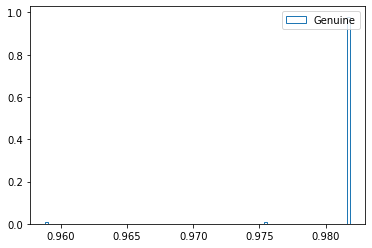

In [26]:
plt.hist(genuine_sift, weights=np.ones_like(genuine_sift) / len(genuine_sift), bins = 100, histtype='step', label = 'Genuine')
plt.legend()
plt.show()

## Plotting imposter histogram separately

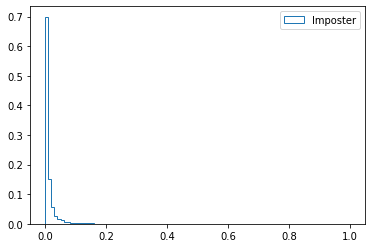

In [27]:
plt.hist(imposter_sift, weights = np.ones_like(imposter_sift) / len(imposter_sift), bins = 100, histtype='step', label = 'Imposter')
plt.legend()
plt.show()

## Plotting ROC curve

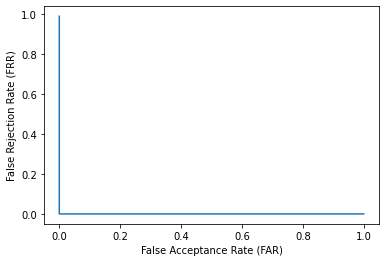

Threshold = 0.8546
EER = 0.00010101010101010101
far = 0.00010101010101010101 frr = 0.0


In [28]:
genuine_sift.sort()
imposter_sift.sort()
frr = list()
far = list()
minimum = float('inf')
threshold = 0
eer = 1
step = 1e-4
for th in np.arange(0, 1, step):
    for y in range(len(genuine_sift)):
        if genuine_sift[y] >= th:
            break
    for x in range(len(imposter_sift)):
        if imposter_sift[x] >= th:
            break
    frr.append(len(genuine_sift[:y]) / len(genuine_sift))
    far.append(len(imposter_sift[x:]) / len(imposter_sift))
    if minimum > abs(far[-1] - frr[-1]):
        threshold = th
        minimum = abs(far[-1] - frr[-1])
        eer = far[-1]

plt.plot(far, frr)
plt.xlabel("False Acceptance Rate (FAR)")
plt.ylabel("False Rejection Rate (FRR)")
plt.show()
print('Threshold =', threshold)
print('EER =', eer)
print('far =', far[int(threshold / step)], 'frr =', frr[int(threshold / step)])

## Computing CRR
For computing CRR we will be using the same threshold value that has been obtained from computing EER. This is because at that threshold value both FAR and FRR are equal which will minimize the total 

In [29]:
genuine_sift.sort()
for x in range(len(genuine_sift)):
    if genuine_sift[x] >= threshold:
        break
for y in range(len(imposter_sift)):
    if imposter_sift[y] >= threshold:
        break
crr = (len(genuine_sift[x:]) + len(imposter_sift[:y])) / (len(genuine_sift) + len(imposter_sift))
print('CRR for SIFT recognition is:', crr)

CRR for SIFT recognition is: 0.9999


# SURF data analysis

## Plotting genuine and imposter histograms together in single plot

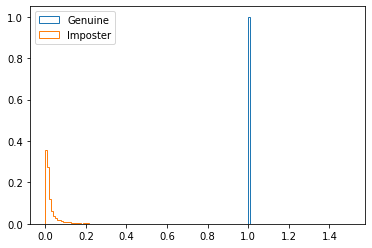

In [30]:
plt.hist(genuine_surf, weights=np.ones_like(genuine_surf) / len(genuine_surf), bins = 100, histtype='step', label = 'Genuine')
plt.hist(imposter_surf, weights = np.ones_like(imposter_surf) / len(imposter_surf), bins = 100, histtype='step', label = 'Imposter')
plt.legend()
plt.show()

## Plotting genuine histogram separately

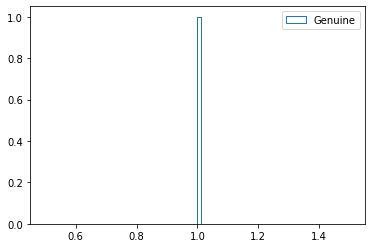

In [31]:
plt.hist(genuine_surf, weights=np.ones_like(genuine_surf) / len(genuine_surf), bins = 100, histtype='step', label = 'Genuine')
plt.legend()
plt.show()

## Plotting imposter histogram separately

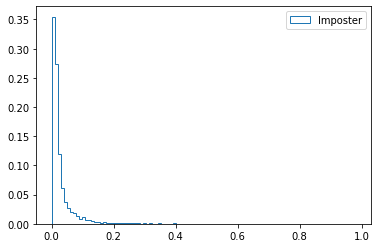

In [32]:
plt.hist(imposter_surf, weights = np.ones_like(imposter_surf) / len(imposter_surf), bins = 100, histtype='step', label = 'Imposter')
plt.legend()
plt.show()

## Plotting ROC curve

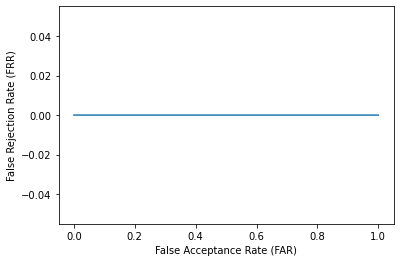

Threshold = 0.8969
EER = 0.00010101010101010101
far = 0.00010101010101010101 frr = 0.0


In [33]:
genuine_surf.sort()
imposter_surf.sort()
frr = list()
far = list()
minimum = float('inf')
threshold = 0
eer = 1
step = 1e-4
for th in np.arange(0, 1, step):
    for y in range(len(genuine_surf)):
        if genuine_surf[y] >= th:
            break
    for x in range(len(imposter_surf)):
        if imposter_surf[x] >= th:
            break
    frr.append(len(genuine_surf[:y]) / len(genuine_surf))
    far.append(len(imposter_surf[x:]) / len(imposter_surf))
    if minimum > abs(far[-1] - frr[-1]):
        threshold = th
        minimum = abs(far[-1] - frr[-1])
        eer = far[-1]

plt.plot(far, frr)
plt.xlabel("False Acceptance Rate (FAR)")
plt.ylabel("False Rejection Rate (FRR)")
plt.show()
print('Threshold =', threshold)
print('EER =', eer)
print('far =', far[int(threshold / step)], 'frr =', frr[int(threshold / step)])

## Computing CRR

In [34]:
genuine_surf.sort()
for x in range(len(genuine_surf)):
    if genuine_surf[x] >= threshold:
        break
for y in range(len(imposter_surf)):
    if imposter_surf[y] >= threshold:
        break
crr = (len(genuine_surf[x:]) + len(imposter_surf[:y])) / (len(genuine_surf) + len(imposter_surf))
print('CRR for SURF recognition is:', crr)

CRR for SURF recognition is: 0.9999


# ORB data analysis

## Plotting genuine and imposter histograms together in single plot

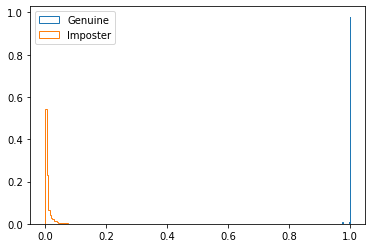

In [35]:
plt.hist(genuine_orb, weights=np.ones_like(genuine_orb) / len(genuine_orb), bins = 100, histtype='step', label = 'Genuine')
plt.hist(imposter_orb, weights = np.ones_like(imposter_orb) / len(imposter_orb), bins = 100, histtype='step', label = 'Imposter')
plt.legend()
plt.show()

## Plotting genuine histogram separately

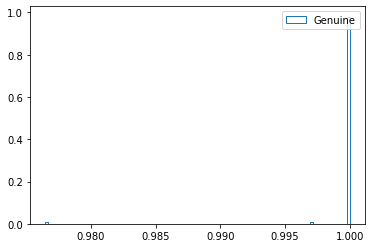

In [36]:
plt.hist(genuine_orb, weights=np.ones_like(genuine_orb) / len(genuine_orb), bins = 100, histtype='step', label = 'Genuine')
plt.legend()
plt.show()

## Plotting imposter histogram separately

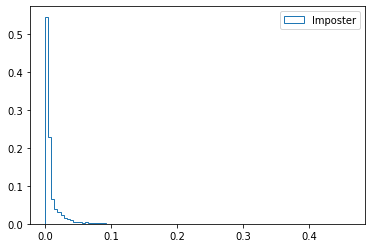

In [37]:
plt.hist(imposter_orb, weights = np.ones_like(imposter_orb) / len(imposter_orb), bins = 100, histtype='step', label = 'Imposter')
plt.legend()
plt.show()

## Plotting ROC curve

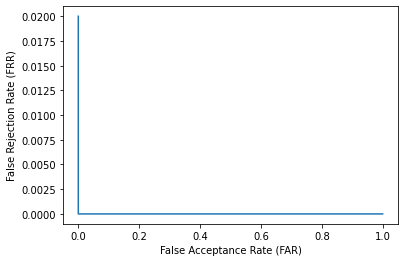

Threshold = 0.4395
EER = 0.00010101010101010101
far = 0.00010101010101010101 frr = 0.0


In [38]:
genuine_orb.sort()
imposter_orb.sort()
frr = list()
far = list()
minimum = float('inf')
threshold = 0
eer = 1
step = 1e-4
for th in np.arange(0, 1, step):
    for y in range(len(genuine_orb)):
        if genuine_orb[y] >= th:
            break
    for x in range(len(imposter_orb)):
        if imposter_orb[x] >= th:
            break
    frr.append(len(genuine_orb[:y]) / len(genuine_orb))
    far.append(len(imposter_orb[x:]) / len(imposter_orb))
    if minimum > abs(far[-1] - frr[-1]):
        threshold = th
        minimum = abs(far[-1] - frr[-1])
        eer = far[-1]

plt.plot(far, frr)
plt.xlabel("False Acceptance Rate (FAR)")
plt.ylabel("False Rejection Rate (FRR)")
plt.show()
print('Threshold =', threshold)
print('EER =', eer)
print('far =', far[int(threshold / step)], 'frr =', frr[int(threshold / step)])

## Computing CRR

In [39]:
for x in range(len(genuine_orb)):
    if genuine_orb[x] >= threshold:
        break
for y in range(len(imposter_orb)):
    if imposter_orb[y] >= threshold:
        break
crr = (len(genuine_orb[x:]) + len(imposter_orb[:y])) / (len(genuine_orb) + len(imposter_orb))
print('CRR for ORB recognition is:', crr)

CRR for ORB recognition is: 0.9999
